In [1]:
import pandas as pd

In [2]:
comp = pd.read_csv('Computer_Data.csv',index_col='Unnamed: 0')

In [3]:
comp.head(10)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
6,3695,66,340,16,14,no,no,yes,94,1
7,1720,25,170,4,14,yes,no,yes,94,1
8,1995,50,85,2,14,no,no,yes,94,1
9,2225,50,210,8,14,no,no,yes,94,1
10,2575,50,210,4,15,no,no,yes,94,1


In [4]:
comp.shape

(6259, 10)

In [5]:
comp.cd = comp.cd.map({'yes':1,'no':0})
comp.multi = comp.multi.map({'yes':1,'no':0})
comp.premium = comp.premium.map({'yes':1,'no':0})

In [6]:
comp.head(10)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,0,0,1,94,1
2,1795,33,85,2,14,0,0,1,94,1
3,1595,25,170,4,15,0,0,1,94,1
4,1849,25,170,8,14,0,0,0,94,1
5,3295,33,340,16,14,0,0,1,94,1
6,3695,66,340,16,14,0,0,1,94,1
7,1720,25,170,4,14,1,0,1,94,1
8,1995,50,85,2,14,0,0,1,94,1
9,2225,50,210,8,14,0,0,1,94,1
10,2575,50,210,4,15,0,0,1,94,1


In [7]:
comp.tail()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6255,1690,100,528,8,15,0,0,1,39,35
6256,2223,66,850,16,15,1,1,1,39,35
6257,2654,100,1200,24,15,1,0,1,39,35
6258,2195,100,850,16,15,1,0,1,39,35
6259,2490,100,850,16,17,1,0,1,39,35


In [8]:
comp.describe()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,0.464611,0.139479,0.902221,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,0.498786,0.346474,0.297040,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.000000,0.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,0.000000,0.000000,1.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,0.000000,0.000000,1.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,1.000000,0.000000,1.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,1.000000,1.000000,1.000000,339.000000,35.000000


In [9]:
def Normalize(data):
    return ((data-data.min())/(data.max()-data.min()))

In [10]:
comp = comp.apply(Normalize)

In [11]:
comp.head(10)

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,0.123596,0.000000,0.000000,0.066667,0.000000,0.0,0.0,1.0,0.183333,0.0
2,0.190112,0.106667,0.002475,0.000000,0.000000,0.0,0.0,1.0,0.183333,0.0
3,0.145169,0.000000,0.044554,0.066667,0.333333,0.0,0.0,1.0,0.183333,0.0
4,0.202247,0.000000,0.044554,0.200000,0.000000,0.0,0.0,0.0,0.183333,0.0
5,0.527191,0.106667,0.128713,0.466667,0.000000,0.0,0.0,1.0,0.183333,0.0
6,0.617079,0.546667,0.128713,0.466667,0.000000,0.0,0.0,1.0,0.183333,0.0
7,0.173258,0.000000,0.044554,0.066667,0.000000,1.0,0.0,1.0,0.183333,0.0
8,0.235056,0.333333,0.002475,0.000000,0.000000,0.0,0.0,1.0,0.183333,0.0
9,0.286742,0.333333,0.064356,0.200000,0.000000,0.0,0.0,1.0,0.183333,0.0
10,0.365393,0.333333,0.064356,0.066667,0.333333,0.0,0.0,1.0,0.183333,0.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

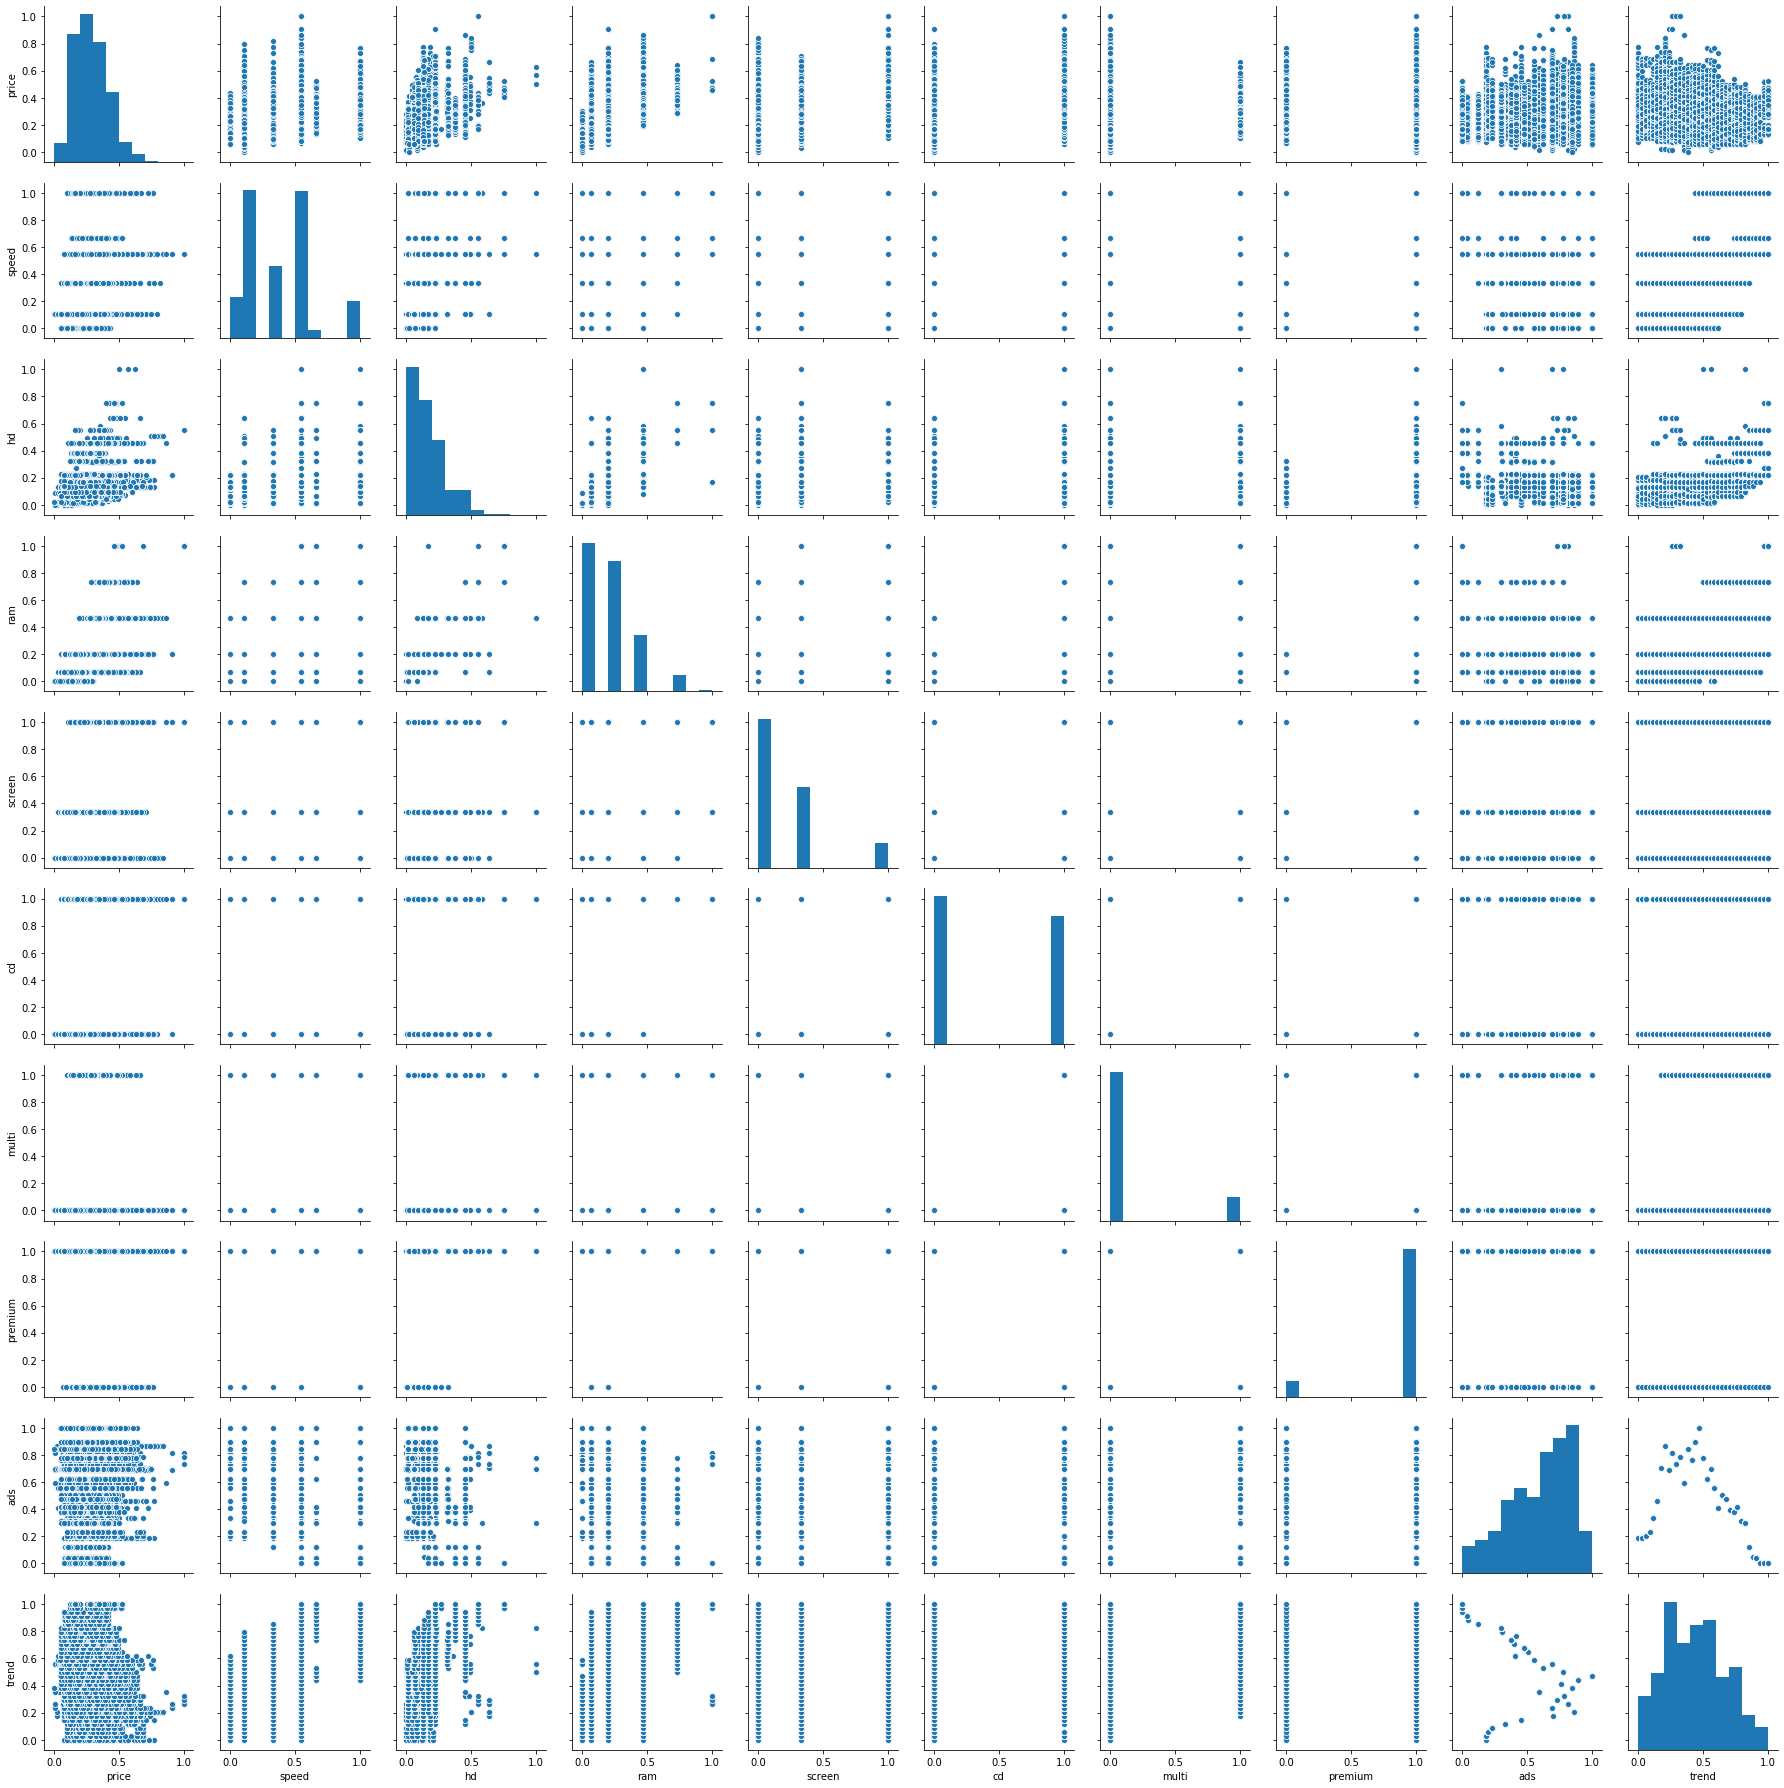

In [13]:
sns.pairplot(comp)

plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import statsmodels.api as sm

In [15]:
xTrain,xTest ,yTrain,yTest = train_test_split(comp[['speed','hd','ram','screen','cd','multi',
                                                    'premium','ads','trend']]
                                             ,comp.price
                                              ,test_size=0.2)




In [16]:
def PredFun(trainX,trainY):
    
    trainX = sm.add_constant(trainX)
    
    smLM = sm.OLS(trainY,trainX).fit()
    
    return smLM

In [17]:
lm = PredFun(trainX = xTrain,trainY= yTrain)

/Users/anupprakash/Anaconda4/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1941.
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:28:10   Log-Likelihood:                 6815.7
No. Observations:                5007   AIC:                        -1.361e+04
Df Residuals:                    4997   BIC:                        -1.355e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3287      0.005     69.233      0.000       0.319       0.338
speed          0.1573      0.004     44.812      0.000       0.150       0.164
hd             0.3621      0.014     26.087      0.000       0.335       0.389
ram            0.3264      0.008     40.868      0.000       0.311       0.342
screen         0.0828      0.003     27.579      0.000       0.077       0.089
cd             0.0128      0.002      5.374      0.000       0.008       0.017
multi          0.0226      0.003      7.802      0.000       0.017       0.028
premium       -0.1170      0.003    -37.668      0.000      -0.123      -0.111
ads            0.0445      0.004     11.396      0.000       0.037       0.052
trend         -0.3993      0.005    -73.862      0.000      -0.410      -0.389
==============================================================================
Omnibus:                      784.361   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2317.862
Skew:                           0.822   Prob(JB):                         0.00
Kurtosis:                       5.900   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
def vif_cal(input_data, dependent_col):
    
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
        
        
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [20]:
vif_cal(input_data = comp, dependent_col='price')

,Var,Vif
1,hd,11.34
8,trend,7.54
2,ram,6.63
6,premium,6.60
7,ads,4.17
4,cd,3.31
0,speed,3.29
3,screen,1.57
5,multi,1.50


In [21]:
temp = xTrain.drop('hd',1)

In [22]:
lm = PredFun(trainX = temp,trainY= yTrain)

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1848.
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:28:11   Log-Likelihood:                 6496.1
No. Observations:                5007   AIC:                        -1.297e+04
Df Residuals:                    4998   BIC:                        -1.292e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3273      0.005     64.690      0.000       0.317       0.337
speed          0.1660      0.004     44.548      0.000       0.159       0.173
ram            0.4792      0.006     82.849      0.000       0.468       0.491
screen         0.0847      0.003     26.457      0.000       0.078       0.091
cd             0.0196      0.003      7.758      0.000       0.015       0.025
multi          0.0160      0.003      5.199      0.000       0.010       0.022
premium       -0.1119      0.003    -33.874      0.000      -0.118      -0.105
ads            0.0288      0.004      7.015      0.000       0.021       0.037
trend         -0.3331      0.005    -65.475      0.000      -0.343      -0.323
==============================================================================
Omnibus:                     1116.165   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4283.720
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       7.000   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
xTrain.head()

,speed,hd,ram,screen,cd,multi,premium,ads,trend
911,0.546667,0.184158,0.466667,0.000000,0.0,0.0,1.0,0.700000,0.176471
4353,0.546667,0.168317,0.200000,0.000000,1.0,1.0,1.0,0.696667,0.558824
1769,0.106667,0.221782,0.466667,0.000000,0.0,0.0,1.0,0.813333,0.264706
4662,0.546667,0.455446,0.733333,0.333333,1.0,0.0,1.0,0.553333,0.588235
1443,0.333333,0.221782,0.466667,0.333333,0.0,0.0,1.0,0.690000,0.235294


In [24]:
reg = LinearRegression()

In [25]:
reg = reg.fit(xTrain,yTrain)

In [26]:
print(reg.intercept_)
print(reg.coef_)

0.32867555793357284
[ 0.15732966  0.36212759  0.32638053  0.08284289  0.0128206   0.02256302
 -0.11697911  0.04445448 -0.39934993]


In [27]:
yPred = reg.predict(xTest)

In [28]:
Price = pd.DataFrame({'Acutal':yTest,'Predicted':yPred})

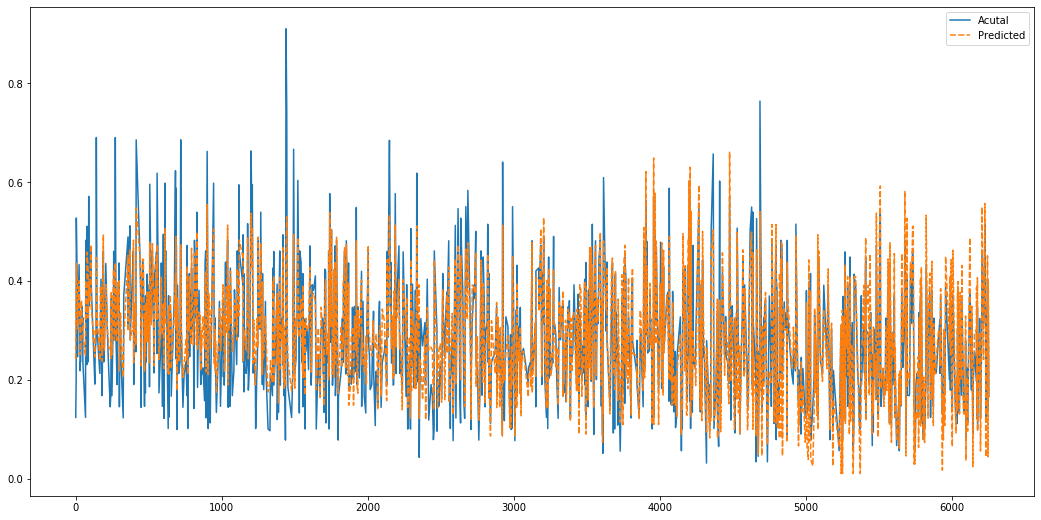

In [29]:
plt.figure(figsize=(18,9))

sns.lineplot(data = Price)

plt.show()

In [30]:
mse = mean_squared_error(yTest,yPred)
r2 = r2_score(yTest,yPred)

In [31]:
print(mse)
print(r2)

0.003732877075227997
0.765503065952447
